In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pickle
with open('../data/Chibab_date_menu.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
len(data[0])

# 데이터 정제

## 날짜/메뉴 데이터 병합

In [86]:
# 메뉴 리스트 정제 함수
def cleaner1(data, drop):
    dic = {}
    n = 0
    dic[0] = []
    exc = ['', '배달팁', '(A) 매출금액', '(B) 고객할인비용', '(C) 차감금액', '(D) 부가세', '(E) 만나서결제금액', '입금예정금액 (A+B+C+D)', '입금예정금액 (A+B+C+D+E)']
    for i in range(len(drop)):
        exc.append(drop[i])

    for i in data[1]:
        if i == '총 결제금액':
            n += 1
            dic[n] = []
            pass
        elif i in exc:
            pass
        else:
            dic[n].append(i)
    space = len(dic)-1
    del dic[space]
    return list(dic.values())

In [217]:
# 날짜와 병합하여 df 만들기
drops = ['┗ 기본', '┗ 기본양념', '┗ 350ml', '┗ 355ml', '┗ 500ml', '┗ 1.25L', '┗ 1.5L', '┗ 병'] # 메뉴 제외 리스트
df = pd.concat((pd.DataFrame([i.split('\n') for i in data[0]]), pd.DataFrame(pd.Series(cleaner1(data, drop=drops)))), axis=1)
df.columns = ['date', 'time', 'menu']
df

,date,time,menu
0,2022. 06. 24. (금),오후 09:48:50,"[직화바베큐 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml)]"
1,2022. 06. 24. (금),오후 06:38:13,"[갈비천왕 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 공기밥 1인분 추가, 양..."
2,2022. 06. 24. (금),오후 06:02:02,"[마늘간장 치밥도시락\n1개, ┗ 김말이 4개, ┗ 피카츄돈까스 1개, ┗ 마늘간장]"
3,2022. 06. 24. (금),오후 05:44:23,"[직화 바베큐 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 소떡소떡 1개, ┗ 중간맛..."
4,2022. 06. 24. (금),오후 12:07:37,"[갈비천왕 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개), 직화양념 ..."
...,...,...,...
995,2022. 01. 09. (일),오후 12:37:52,"[직화바베큐 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 푸딩스퇄 계란찜 小 추가]"
996,2022. 01. 09. (일),오전 10:48:42,"[갈비천왕 치밥도시락\n1개, ┗ 치즈떡 4개 추가, ┗ 쫄깃 밀떡 10개 추가, ..."
997,2022. 01. 08. (토),오후 08:21:04,"[고기만 2배 (밥X)\n1개, ┗ 라이스 찰고구마볼 4개, ┗ 직화양념 (매콤) ..."
998,2022. 01. 08. (토),오후 12:33:36,"[갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 순한맛, 직화바베큐 치밥도시락..."


In [183]:
li = []
for me in list(df['menu']):
    for m in me:
        if m not in li:
            li.append(m)
li

['직화바베큐 치밥도시락\n1개',
 '┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml)',
 '갈비천왕 치밥도시락\n1개',
 '┗ 고기 100g 추가',
 '┗ 공기밥 1인분 추가',
 '양념치킨 치밥도시락\n1개',
 '마늘간장 치밥도시락\n1개',
 '┗ 김말이 4개',
 '┗ 피카츄돈까스 1개',
 '┗ 마늘간장',
 '직화 바베큐 치밥 시키면 미니떡볶이 서비스\n1개',
 '┗ 소떡소떡 1개',
 '┗ 중간맛',
 '매콤양념 치밥도시락\n1개',
 '┗ 한입핫도그 5개',
 '┗ ㄹlㅇ뷰 ㅇl벤트(비엔나 소세지5개)',
 '┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개)',
 '직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개',
 '갈비천왕 치밥도시락\n2개',
 '┗ 쫄깃 밀떡 10개 추가',
 '┗ 비엔나소세지 5개 추가',
 '┗ 메추리알 6개 추가',
 '직화양념 치밥도시락 (매콤) (지코X 스타일)\n2개',
 '직화바베큐 치밥도시락\n2개',
 '┗ 야끼만두 5개',
 '┗ 푸딩스퇄 계란찜 大 추가',
 '┗ 쿨피스 캔 350ml 추가',
 '매콤간장 치밥도시락\n1개',
 '갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개',
 '┗ 순한맛',
 '┗ 오징어튀김 2개',
 '┗ 체다슬라이스 치즈 2장',
 '┗ 매콤양념',
 '┗ ㄹlㅇ뷰 ㅇl벤트( 메추리알4개)',
 '┗ 깍두기 추가',
 '매콤간장 치밥도시락\n2개',
 '┗ 펩시콜라 1.25L 추가',
 '쿨피스 캔(복숭아맛)\n1개',
 '펩시콜라\n1개',
 '┗ 치즈떡 4개 추가',
 '고기만 2배 (밥X)\n1개',
 '┗ 직화양념 (매콤) (지코X 스타일)',
 '┗ 수제 등심돈까츠',
 '직화양념(매콤)(지코X) 치밥 시키면 미니떡볶이 서비스\n1개',
 '┗ 직화바베큐',
 '┗ 계란후라이 1개 추가',
 '┗ 펩시콜라 500ml 추가',
 '┗ 갈비천왕',
 '┗ 미니떡볶이',
 '┗ 단무지 추가',
 '┗ 우유튀김 5개',
 '┗ 15cm 왕새우튀김 2개',
 '┗ 공기밥 2인분 

## 점심 시간 정보 추가

In [218]:
df.loc[df['time'].apply(lambda x: True if x[:2] == '오전' else False), 'Hour'] = 'Lunch'
#df.loc[df['time'].apply(lambda x: True if x[:2] == '오후' else False), 'Hour'] = 'Dinner'
df.loc[df['time'].apply(lambda x: True if x[:5] == '오후 12' else False), 'Hour'] = 'Lunch'
df

,date,time,menu,Hour
0,2022. 06. 24. (금),오후 09:48:50,"[직화바베큐 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml)]",NaN
1,2022. 06. 24. (금),오후 06:38:13,"[갈비천왕 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 공기밥 1인분 추가, 양...",NaN
2,2022. 06. 24. (금),오후 06:02:02,"[마늘간장 치밥도시락\n1개, ┗ 김말이 4개, ┗ 피카츄돈까스 1개, ┗ 마늘간장]",NaN
3,2022. 06. 24. (금),오후 05:44:23,"[직화 바베큐 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 소떡소떡 1개, ┗ 중간맛...",NaN
4,2022. 06. 24. (금),오후 12:07:37,"[갈비천왕 치밥도시락\n1개, ┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개), 직화양념 ...",Lunch
...,...,...,...,...
995,2022. 01. 09. (일),오후 12:37:52,"[직화바베큐 치밥도시락\n1개, ┗ 고기 100g 추가, ┗ 푸딩스퇄 계란찜 小 추가]",Lunch
996,2022. 01. 09. (일),오전 10:48:42,"[갈비천왕 치밥도시락\n1개, ┗ 치즈떡 4개 추가, ┗ 쫄깃 밀떡 10개 추가, ...",Lunch
997,2022. 01. 08. (토),오후 08:21:04,"[고기만 2배 (밥X)\n1개, ┗ 라이스 찰고구마볼 4개, ┗ 직화양념 (매콤) ...",NaN
998,2022. 01. 08. (토),오후 12:33:36,"[갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개, ┗ 순한맛, 직화바베큐 치밥도시락...",Lunch


In [220]:
df_Hour = pd.get_dummies(df['Hour'])
#df_Hour.loc[df_Hour['Dinner']==1, 'Dinner'] = True
#df_Hour.loc[df_Hour['Dinner']==0, 'Dinner'] = False
df_Hour.loc[df_Hour['Lunch']==1, 'Lunch'] = True
df_Hour.loc[df_Hour['Lunch']==0, 'Lunch'] = False
df_Hour

,Lunch
0,False
1,False
2,False
3,False
4,True
...,...
995,True
996,True
997,False
998,True


# 연관규칙 마이닝: Apriori

In [221]:
# apriori 알고리즘
from mlxtend.frequent_patterns import apriori, association_rules
# 연관분석용 데이터 파일 변환
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [222]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

## 거래 데이터 생성

In [219]:
basket = list(df['menu'])

In [223]:
te = TransactionEncoder()
ted = te.fit(basket).transform(basket)
ted

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [232]:
ARM_df = pd.DataFrame(ted, columns=te.columns_)
ARM_df = pd.concat([ARM_df, df_Hour], axis=1) # 시간정보 병합
ARM_df

,┗ 15cm 왕새우튀김 2개,┗ ㄹlㅇ뷰 ㅇl벤트( 메추리알4개),┗ ㄹlㅇ뷰 ㅇl벤트(비엔나 소세지5개),┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개),┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml),┗ 갈비천왕,┗ 계란후라이 1개 추가,┗ 고구마튀김 4개,┗ 고기 100g 추가,┗ 공기밥 1인분 추가,...,진로 이즈백\n1개,참이슬 후레쉬\n1개,참이슬 후레쉬\n2개,칠성사이다\n1개,쿨피스 캔(복숭아맛)\n1개,쿨피스 캔(복숭아맛)\n2개,테라\n1개,테라\n2개,펩시콜라\n1개,Lunch
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## 2. 탐색적 데이터 분석

In [267]:
freq = ARM_df.sum().to_frame('Frequency')
freq_sort = freq.sort_values('Frequency', ascending = False)
freq_sort = freq_sort[freq_sort['Frequency'] > 10]

In [268]:
freq_sort['Support'] = freq_sort['Frequency'] / len(ARM_df)
freq_sort

,Frequency,Support
직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개,335,0.335
Lunch,313,0.313
직화바베큐 치밥도시락\n1개,235,0.235
갈비천왕 치밥도시락\n1개,232,0.232
┗ 고기 100g 추가,159,0.159
양념치킨 치밥도시락\n1개,106,0.106
┗ 피카츄돈까스 1개,74,0.074
┗ 공기밥 1인분 추가,72,0.072
마늘간장 치밥도시락\n1개,71,0.071
┗ 마늘간장,68,0.068


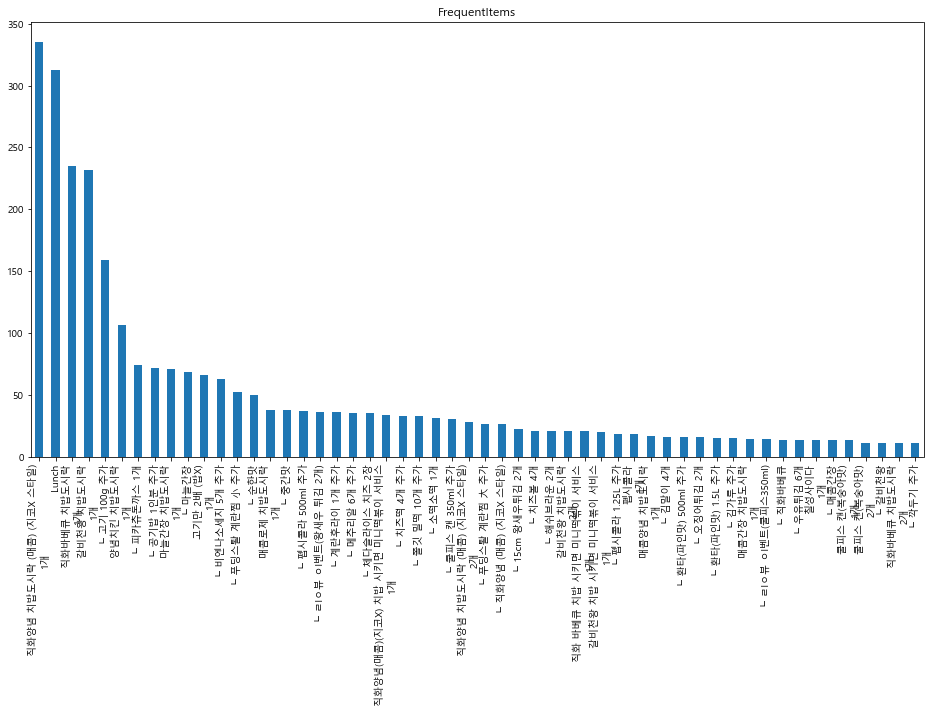

In [269]:
freq_sort['Frequency'].plot(kind='bar', title='FrequentItems', figsize = (16, 8));

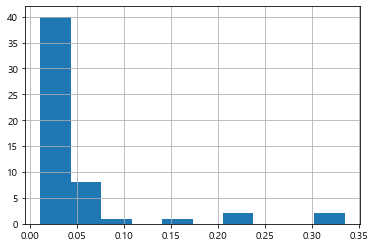

In [270]:
freq_sort['Support'].hist();

## 3. 연관규칙 생성

In [271]:
freq_items = apriori(ARM_df, min_support=0.005, use_colnames=True)
freq_items

,support,itemsets
0,0.022,(┗ 15cm 왕새우튀김 2개)
1,0.009,(┗ ㄹlㅇ뷰 ㅇl벤트(비엔나 소세지5개))
2,0.036,(┗ ㄹlㅇ뷰 ㅇl벤트(왕새우 튀김 2개))
3,0.014,(┗ ㄹlㅇ뷰 ㅇl벤트(쿨피스350ml))
4,0.011,(┗ 갈비천왕)
...,...,...
363,0.005,"(┗ 고기 100g 추가, ┗ 체다슬라이스 치즈 2장, 직화양념 치밥도시락 (매콤)..."
364,0.005,"(┗ 고기 100g 추가, Lunch, 직화양념 치밥도시락 (매콤) (지코X 스타일..."
365,0.005,"(┗ 고기 100g 추가, Lunch, 직화양념 치밥도시락 (매콤) (지코X 스타일..."
366,0.006,"(Lunch, 마늘간장 치밥도시락\n1개, 양념치킨 치밥도시락\n1개, ┗ 마늘간장)"


In [272]:
rules = association_rules(freq_items, metric = 'confidence', min_threshold = 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(┗ 갈비천왕),(고기만 2배 (밥X)\n1개),0.011,0.066,0.011,1.000000,15.151515,0.010274,inf
1,(┗ 고구마튀김 4개),(갈비천왕 치밥도시락\n1개),0.006,0.232,0.005,0.833333,3.591954,0.003608,4.608000
2,(마늘간장 치밥도시락\n1개),(┗ 마늘간장),0.071,0.068,0.061,0.859155,12.634631,0.056172,6.617200
3,(┗ 마늘간장),(마늘간장 치밥도시락\n1개),0.068,0.071,0.061,0.897059,12.634631,0.056172,9.024571
4,(┗ 매콤간장),(마늘간장 치밥도시락\n1개),0.013,0.071,0.011,0.846154,11.917660,0.010077,6.038500
5,(┗ 매콤로제),(고기만 2배 (밥X)\n1개),0.005,0.066,0.005,1.000000,15.151515,0.004670,inf
6,(┗ 매콤양념),(양념치킨 치밥도시락\n1개),0.007,0.106,0.005,0.714286,6.738544,0.004258,3.129000
7,(갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개),(┗ 순한맛),0.020,0.050,0.015,0.750000,15.000000,0.014000,3.800000
8,(┗ 직화바베큐),(고기만 2배 (밥X)\n1개),0.013,0.066,0.013,1.000000,15.151515,0.012142,inf
9,(┗ 직화양념 (매콤) (지코X 스타일)),(고기만 2배 (밥X)\n1개),0.026,0.066,0.026,1.000000,15.151515,0.024284,inf


In [273]:
rules = rules[(rules['lift'] > 1)]
rules.sort_values(by = 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(┗ 갈비천왕),(고기만 2배 (밥X)\n1개),0.011,0.066,0.011,1.000000,15.151515,0.010274,inf
49,"(Lunch, 마늘간장 치밥도시락\n1개, 양념치킨 치밥도시락\n1개)",(┗ 마늘간장),0.006,0.068,0.006,1.000000,14.705882,0.005592,inf
30,"(마늘간장 치밥도시락\n1개, 양념치킨 치밥도시락\n1개)",(┗ 마늘간장),0.009,0.068,0.009,1.000000,14.705882,0.008388,inf
34,"(마늘간장 치밥도시락\n1개, 직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개)",(┗ 마늘간장),0.007,0.068,0.007,1.000000,14.705882,0.006524,inf
35,"(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개, ┗ 마늘간장)",(마늘간장 치밥도시락\n1개),0.007,0.071,0.007,1.000000,14.084507,0.006503,inf
41,"(Lunch, ┗ 직화양념 (매콤) (지코X 스타일))",(고기만 2배 (밥X)\n1개),0.008,0.066,0.008,1.000000,15.151515,0.007472,inf
21,"(┗ 비엔나소세지 5개 추가, ┗ 해쉬브라운 2개)",(┗ 고기 100g 추가),0.005,0.159,0.005,1.000000,6.289308,0.004205,inf
19,"(┗ 고기 100g 추가, ┗ 마늘간장)",(마늘간장 치밥도시락\n1개),0.005,0.071,0.005,1.000000,14.084507,0.004645,inf
18,"(┗ 고기 100g 추가, 마늘간장 치밥도시락\n1개)",(┗ 마늘간장),0.005,0.068,0.005,1.000000,14.705882,0.004660,inf
14,"(Lunch, ┗ 갈비천왕)",(고기만 2배 (밥X)\n1개),0.006,0.066,0.006,1.000000,15.151515,0.005604,inf


- 조건부에 'Lunch'가 있는 규칙

In [277]:
rules[rules.antecedents.apply(lambda x:'Lunch' in x)].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(Lunch, ┗ 갈비천왕)",(고기만 2배 (밥X)\n1개),0.006,0.066,0.006,1.000000,15.151515,0.005604,inf
41,"(Lunch, ┗ 직화양념 (매콤) (지코X 스타일))",(고기만 2배 (밥X)\n1개),0.008,0.066,0.008,1.000000,15.151515,0.007472,inf
40,"(갈비천왕 치밥 시키면 미니떡볶이 서비스\n1개, Lunch)",(┗ 순한맛),0.008,0.050,0.006,0.750000,15.000000,0.005600,3.800000
49,"(Lunch, 마늘간장 치밥도시락\n1개, 양념치킨 치밥도시락\n1개)",(┗ 마늘간장),0.006,0.068,0.006,1.000000,14.705882,0.005592,inf
51,"(Lunch, 마늘간장 치밥도시락\n1개, 직화바베큐 치밥도시락\n1개)",(┗ 마늘간장),0.005,0.068,0.005,1.000000,14.705882,0.004660,inf
50,"(Lunch, 양념치킨 치밥도시락\n1개, ┗ 마늘간장)",(마늘간장 치밥도시락\n1개),0.006,0.071,0.006,1.000000,14.084507,0.005574,inf
36,"(Lunch, 마늘간장 치밥도시락\n1개)",(┗ 마늘간장),0.025,0.068,0.022,0.880000,12.941176,0.020300,7.766667
37,"(Lunch, ┗ 마늘간장)",(마늘간장 치밥도시락\n1개),0.024,0.071,0.022,0.916667,12.910798,0.020296,11.148000
52,"(Lunch, 직화바베큐 치밥도시락\n1개, ┗ 마늘간장)",(마늘간장 치밥도시락\n1개),0.006,0.071,0.005,0.833333,11.737089,0.004574,5.574000
43,"(펩시콜라\n1개, Lunch)",(직화양념 치밥도시락 (매콤) (지코X 스타일)\n1개),0.006,0.335,0.005,0.833333,2.487562,0.002990,3.990000


- 결론구에 'Lunch'가 있는 규칙

In [275]:
rules[rules.consequents.apply(lambda x:'Lunch' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(직화양념 치밥도시락 (매콤) (지코X 스타일)\n3개),(Lunch),0.01,0.313,0.009,0.9,2.875399,0.00587,6.87
